In [1]:
import urllib.request
import json
import pandas as pd

propertyid = "Property:P856"
url = (
    "https://www.wikidata.org/w/api.php?action=query&prop=revisions&titles="
    + propertyid
    + "&rvprop=timestamp|comment|ids&rvlimit=500&format=json"
)
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))

In [2]:
array = []

for data in responsedata["query"]["pages"]:
    for revision in responsedata["query"]["pages"][data]["revisions"]:
        print(revision.keys())
        break

dict_keys(['revid', 'parentid', 'timestamp', 'comment'])


In [3]:
result = list(responsedata["query"]["pages"].values())[0]
revisions = result["revisions"]
revision = result["revisions"][0].keys()
revision

dict_keys(['revid', 'parentid', 'timestamp', 'comment'])

In [4]:
array = []

for revision in revisions:
    array.append([revision["timestamp"], revision["comment"]])

In [5]:
array[:1]

[['2025-05-10T11:51:46Z',
  '/* wbsetclaim-update:2||1|2 */ [[Property:P2302]]: [[Q21502404]]']]

In [6]:
dataframe = pd.DataFrame(array, columns=["timestamp", "modification"])
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')
dataframe = dataframe.astype(
    dtype={"modification": "<U1000"}
)

dataframe["timestamp"] = pd.to_datetime(
    dataframe["timestamp"],
    format="%d/%m/%Y",
    unit="D",
    errors="raise",
).dt.normalize()
dataframe

,timestamp,modification
0,2025-05-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
1,2025-05-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
2,2025-05-07,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
3,2025-05-07,/* wbsetclaim-update:2||1|5 */ [[Property:P230...
4,2025-05-07,/* wbsetclaim-update:2||1|3 */ [[Property:P230...
...,...,...
495,2021-03-26,"/* wbsetaliases-add:3|bs */ službeni sajt, zva..."
496,2021-03-26,/* wbsetdescription-add:1|bs */ URL zvanične p...
497,2021-03-26,/* wbsetlabel-set:1|bs */ zvanični sajt
498,2021-03-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...


In [7]:
group = dataframe.groupby("timestamp").agg("count").reset_index()
group

,timestamp,modification
0,2021-03-10,2
1,2021-03-26,3
2,2021-03-30,1
3,2021-04-03,2
4,2021-04-08,1
...,...,...
225,2025-04-20,3
226,2025-05-04,1
227,2025-05-05,2
228,2025-05-07,12


In [8]:
group.describe()

,timestamp,modification
count,230,230.000000
mean,2023-04-13 10:51:07.826086912,2.173913
min,2021-03-10 00:00:00,1.000000
25%,2022-06-04 12:00:00,1.000000
50%,2023-03-02 12:00:00,1.000000
75%,2024-03-16 18:00:00,2.000000
max,2025-05-10 00:00:00,64.000000
std,NaN,4.586406


In [9]:
group.dtypes

timestamp       datetime64[ns]
modification             int64
dtype: object

In [10]:
group.modification.max()

np.int64(64)

In [11]:
group.modification.min()

np.int64(1)

In [12]:
#%pip install calplot

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x850 with 6 Axes>,
 array([<Axes: ylabel='2021'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2023'>, <Axes: ylabel='2024'>,
        <Axes: ylabel='2025'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


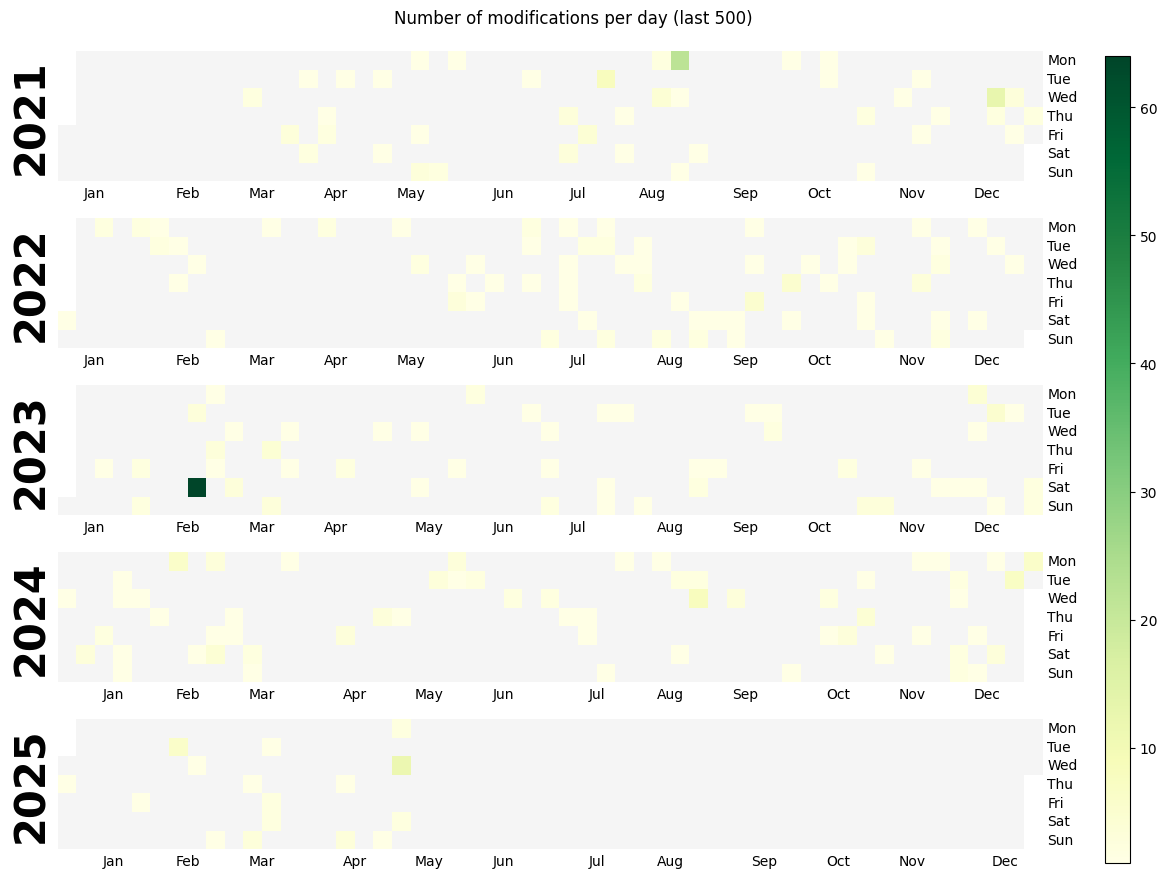

In [13]:
import calplot

days = group["timestamp"]

events = pd.Series(list(group["modification"]), index=days)
calplot.calplot(
    events,
    cmap="YlGn",
    yearlabel_kws={"color": "black"},
    linewidth=0,
    suptitle="Number of modifications per day (last 500)",
)

In [14]:
#%pip install plotly

In [15]:
#%pip install nbformat>=4.2.0
#%pip install nbformat


In [16]:
import nbformat

import plotly.express as px

fig = px.histogram(
    group,
    x="timestamp",
    y="modification",
    nbins=20,
    labels={"x": "month", "y": "count"},
)
fig.update_layout(bargap=0.2)
fig.show()

In [17]:
import plotly.express as px

fig = px.scatter(
    group, x="timestamp", y="modification", labels={"x": "month", "y": "count"}
)
fig.update_layout(bargap=0.2)
fig.show()

In [18]:
import plotly.express as px

fig = px.histogram(group, x="modification", histnorm="probability density", nbins=20)
fig.update_layout(bargap=0.2)
fig.show()

In [19]:
#%pip install SPARQLWrapper

In [20]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?heritagesite ?label ?coordinates {
  ?heritagesite wdt:P1435 wd:Q9259;
        wdt:P17 wd:Q142;
        rdfs:label ?label;
        wdt:P625 ?coordinates.
        FILTER (lang(?label)="en")
}
LIMIT 100
"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

array = []
for result in results["results"]["bindings"]:
    array.append(
        [
            result["heritagesite"]["value"],
            result["label"]["value"],
            result["coordinates"]["value"],
        ]
    )

In [21]:
#%pip install shapely
#%pip install geopandas

In [22]:
#%pip install geopandas

from shapely import wkt
import geopandas as gp

dataframe = pd.DataFrame(array, columns=["ID", "label", "coordinates"])
dataframe["coordinates"] = dataframe["coordinates"].apply(wkt.loads)

geodataframe = gp.GeoDataFrame(dataframe, geometry="coordinates")

In [23]:
array[:1]

[['http://www.wikidata.org/entity/Q8399',
  'Vieux Lyon',
  'Point(4.828056 45.763056)']]

In [36]:
geodataframe.dtypes

ID               object
label            object
coordinates    geometry
dtype: object

In [ ]:
#%pip install folium
import folium

map = folium.Map(location=[45.1093, 2.6753], zoom_start=6)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geodataframe.geometry]

  Using cached folium-0.19.5-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached folium-0.19.5-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
i = 0
for coordinates in geo_df_list:
    map.add_child(
        folium.Marker(
            location=coordinates,
            icon=folium.Icon(color="green"),
            popup="Wikidata: <a target='_blank' href='"
            + str(geodataframe.ID[i])
            + "'>"
            + str(geodataframe.label[i]),
        )
    )
    i = i + 1

map